In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'Week2_challenge_data_source.xlsx')

## Data Preprocessing

In [3]:
data.fillna(data.mean)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1.82365e+06,2.08201e+14,3.3665e+10,3.55212e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.67497e+07,3.0888e+08
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1.3651e+06,2.08202e+14,3.36819e+10,3.5794e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.38004e+07,6.53385e+08
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1.36176e+06,2.082e+14,3.37606e+10,3.52815e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.78836e+07,2.79807e+08
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1.32151e+06,2.08201e+14,3.37503e+10,3.53566e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.33242e+07,8.46029e+08
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1.08901e+06,2.08201e+14,3.36998e+10,3.5407e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.85428e+07,5.69139e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451,2019-04-30 06:02:33,214,81230,2.08202e+14,3.36507e+10,3.54831e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.76289e+07,5.74175e+08
149997,7349883264234609664,2019-04-29 07:28:42,483,2019-04-30 10:41:33,187,97970,2.08202e+14,3.36634e+10,3.56605e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.91351e+07,6.66649e+08
149998,13114483573367300096,2019-04-29 07:28:43,283,2019-04-30 10:46:12,810,98249,2.08202e+14,3.36219e+10,3.57212e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.49122e+07,5.92786e+08
149999,13114483573367300096,2019-04-29 07:28:43,696,2019-04-30 10:40:34,327,97910,2.08202e+14,3.36196e+10,8.61862e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.96261e+07,3.71896e+08


In [4]:
data.groupby(['MSISDN/Number']).agg({'Bearer Id': ['count']})
data.groupby(['MSISDN/Number']).agg({'Dur. (ms)': ['sum']})
data.groupby('MSISDN/Number')['Total DL (Bytes)','Total UL (Bytes)'].sum()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197021e+12,1.948281e+08,37295915.0


In [5]:
#Aggregate the total data volume during session for each application
def aggregate(column1,column2):
    return data[column1] + data[column2]
    

In [6]:
data['Total DL and UL'] =  aggregate('Total UL (Bytes)','Total DL (Bytes)')
data['Total SocialMedia Data'] = aggregate('Social Media DL (Bytes)','Social Media UL (Bytes)')
data['Total Google Data'] = aggregate('Google DL (Bytes)','Google UL (Bytes)')
data['Total Email Data'] = aggregate('Email DL (Bytes)','Email UL (Bytes)')
data['Total Youtube Data'] = aggregate('Youtube DL (Bytes)','Youtube UL (Bytes)')
data['Total Netflix Data'] = aggregate('Netflix DL (Bytes)','Netflix UL (Bytes)')
data['Total Gaming Data'] = aggregate('Gaming DL (Bytes)','Gaming UL (Bytes)')

In [7]:
##Top ten handsets used by the customers
data.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(10)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: MSISDN/Number, dtype: int64

In [8]:
##Top 3 handsets manufacturer
data.groupby(['Handset Manufacturer'])['MSISDN/Number'].count().sort_values(ascending=False).head(3)

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: MSISDN/Number, dtype: int64

In [9]:
##Top 5 handsets per headset manufacturer
data.groupby(['Handset Manufacturer','Handset Type'])['MSISDN/Number'].count().sort_values(ascending=False).head(9)

Handset Manufacturer  Handset Type                
Huawei                Huawei B528S-23A                19727
Apple                 Apple iPhone 6S (A1688)          9413
                      Apple iPhone 6 (A1586)           9012
undefined             undefined                        8931
Apple                 Apple iPhone 7 (A1778)           6304
                      Apple iPhone Se (A1723)          5176
                      Apple iPhone 8 (A1905)           4985
                      Apple iPhone Xr (A2105)          4562
Samsung               Samsung Galaxy S8 (Sm-G950F)     4480
Name: MSISDN/Number, dtype: int64

## Non Graphical Univariate analysis

In [10]:
def univariateAnalysis(column,other_ness):
    min_value = column.min()
    max_value = column.max()
    quartiles = np.percentile(column, [25, 50, 75])
    First_quartile = quartiles[0]
    Second_quartile = quartiles[1]
    Third_quartile = quartiles[2]
    Mean = column.mean()
    
    print('min_value =',+ min_value ,
          'max_value =',+ max_value ,
          'First_quartile =',+ First_quartile ,
          'Second_quartile =',+ Second_quartile ,
          'Third_quartile = ',+ Third_quartile ,
          'Mean =', + Mean
         )
    return [min_value,max_value,First_quartile,Second_quartile,Third_quartile,Mean ]
   

In [11]:
Session_duration = univariateAnalysis(data['Dur. (ms)'], 'session duration')
Total_data = univariateAnalysis(data['Total DL and UL'], 'Total Data')
Total_SocialMedia_Data =  univariateAnalysis(data['Total SocialMedia Data'], 'Social Media Data')
Total_Google_Data =  univariateAnalysis(data['Total Google Data'], 'Google Data')
Total_Email_Data =  univariateAnalysis(data['Total Email Data'], 'Email Data')
Total_Youtube_Data =  univariateAnalysis(data['Total Youtube Data'], 'Youtube Data')
Total_Netflix_Data =  univariateAnalysis(data['Total Netflix Data'], 'Netflix Data')
Total_Gaming_Data =  univariateAnalysis(data['Total Gaming Data'], 'Gaming Data')


min_value = 7142.0 max_value = 1859336.0 First_quartile = nan Second_quartile = nan Third_quartile =  nan Mean = 104608.56034666667
min_value = 28956107.0 max_value = 955984776.0 First_quartile = nan Second_quartile = nan Third_quartile =  nan Mean = 495764636.3710733
min_value = 1563.0 max_value = 3650861.0 First_quartile = 932218.0 Second_quartile = 1826471.0 Third_quartile =  2727487.0 Mean = 1828250.2080266667
min_value = 40330.0 max_value = 15528782.0 First_quartile = 4943599.0 Second_quartile = 7812835.0 Third_quartile =  10682796.0 Mean = 7807294.545573334
min_value = 8359.0 max_value = 4518036.0 First_quartile = 1359344.0 Second_quartile = 2263567.0 Third_quartile =  3159818.0 Mean = 2259102.3099599998
min_value = 78903.0 max_value = 45190078.0 First_quartile = 15998463.0 Second_quartile = 22661770.0 Third_quartile =  29292604.0 Mean = 22643482.6386
min_value = 98432.0 max_value = 45198153.0 First_quartile = 15979455.0 Second_quartile = 22635545.0 Third_quartile =  29290445.0 M

In [12]:
print(Total_data)

[28956107.0, 955984776.0, nan, nan, nan, 495764636.3710733]


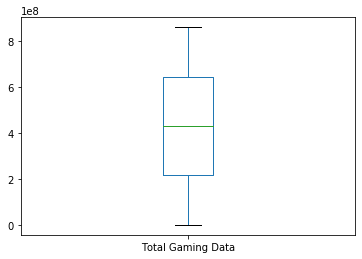

In [13]:
data['Total Gaming Data'].plot.box()

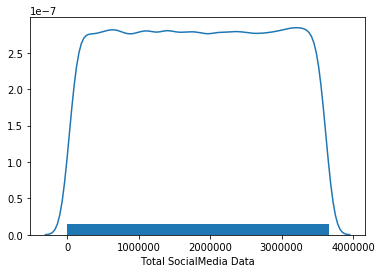

In [14]:
sns.distplot(data['Total SocialMedia Data'],hist=False,rug=True)

## Total Social Media Data is high distributed

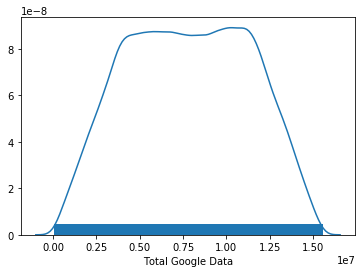

In [15]:
sns.distplot(data['Total Google Data'],hist=False,rug=True)

## Total Google data is highly distributed

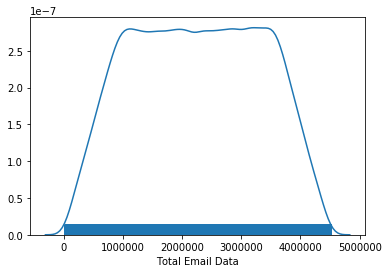

In [16]:
sns.distplot(data['Total Email Data'],hist=False,rug=True)

## Total Email Data is highly distributed

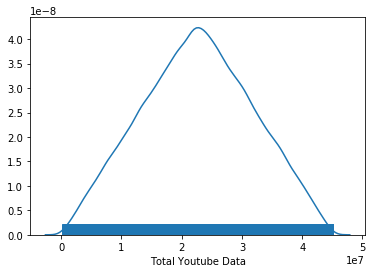

In [17]:
sns.distplot(data['Total Youtube Data'],hist=False,rug=True)

## Total Youtube data is sparsely distributed

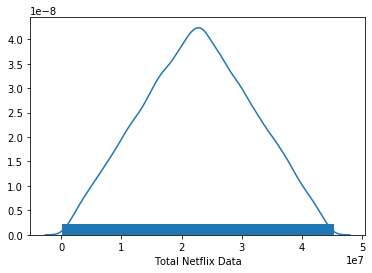

In [18]:
sns.distplot(data['Total Netflix Data'],hist=False,rug=True)

In [19]:
## Total netflix data is sparsely distributed

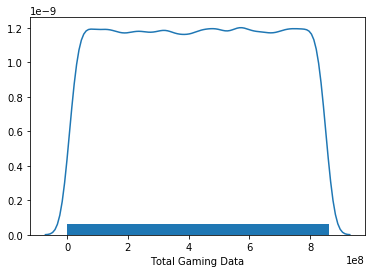

In [20]:
sns.distplot(data['Total Gaming Data'],hist=False,rug=True)

## Total gaming data is highly distributed

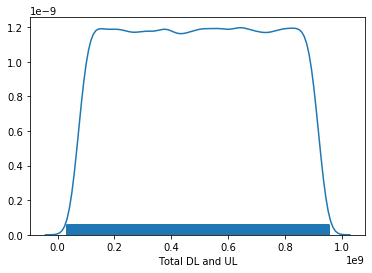

In [21]:
sns.distplot(data['Total DL and UL'],hist=False,rug=True)

## Total Download and Upload is Highly distributed

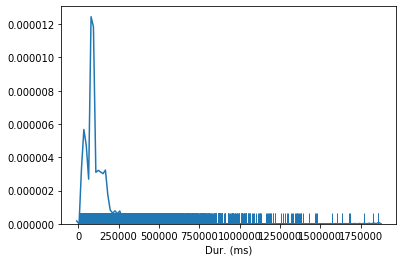

In [22]:
sns.distplot(data['Dur. (ms)'],hist=False,rug=True)

## Session duration is not distributed  

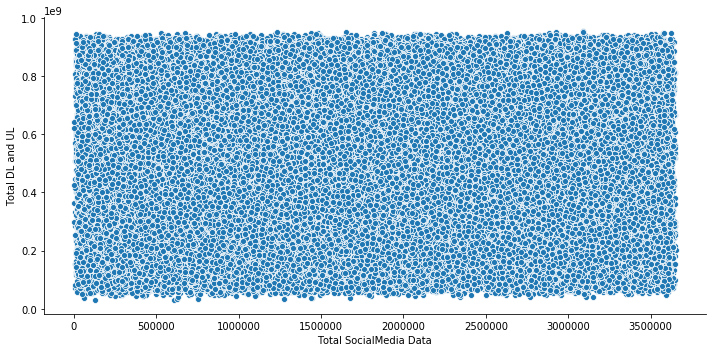

In [24]:
sns.relplot(x='Total SocialMedia Data',y='Total DL and UL',data=data,aspect=2.0)

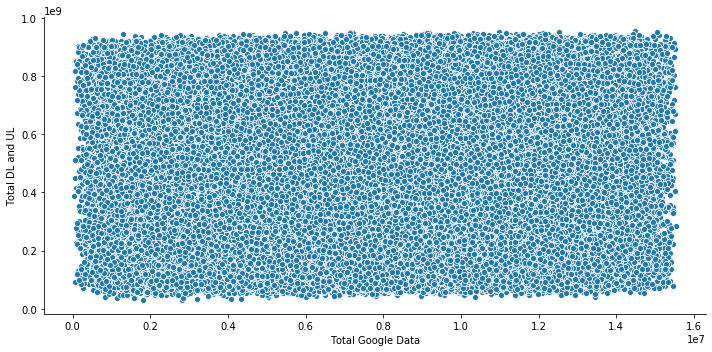

In [25]:
sns.relplot(x='Total Google Data',y='Total DL and UL',data=data,aspect=2.0)

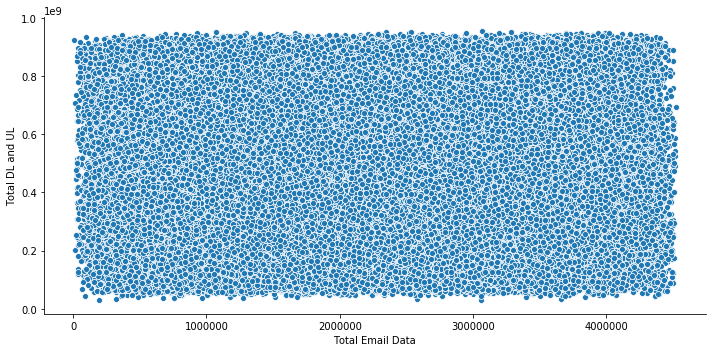

In [26]:
sns.relplot(x='Total Email Data',y='Total DL and UL',data=data,aspect=2.0)

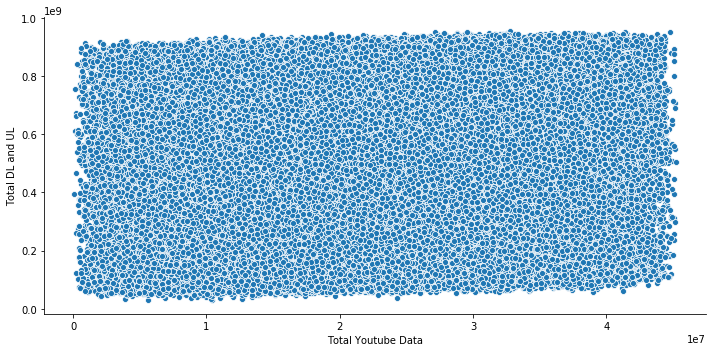

In [28]:
sns.relplot(x='Total Youtube Data',y='Total DL and UL',data=data,aspect=2.0)

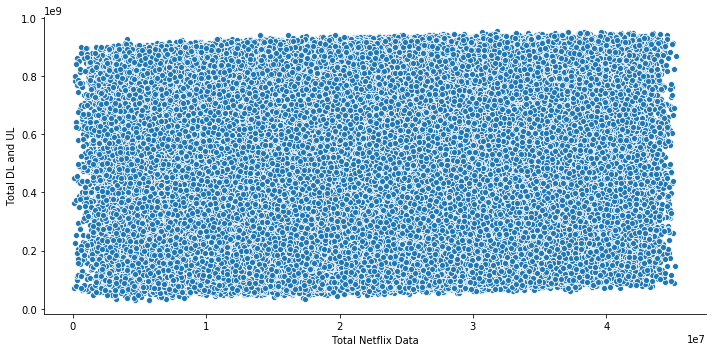

In [29]:
sns.relplot(x='Total Netflix Data',y='Total DL and UL',data=data,aspect=2.0)

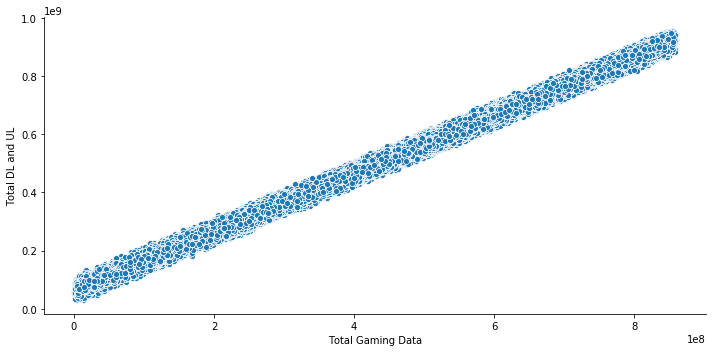

In [30]:
sns.relplot(x='Total Gaming Data',y='Total DL and UL',data=data,aspect=2.0)